In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import glob
%matplotlib inline

In [2]:
df_idx = pd.read_csv('C:/Users/sashv/Downloads/Electricity data/electricity-2.csv')
df_idx.head(5)

,REGION,SETTLEMENTDATE,DATE,Time,Day Night,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,1/01/2018 0:30,1/01/2018 0:00,12:30:00,AM,6912.25,91.86,TRADE
1,NSW1,1/01/2018 1:00,1/01/2018 0:00,1:00:00,AM,6745.63,88.83,TRADE
2,NSW1,1/01/2018 1:30,1/01/2018 0:00,1:30:00,AM,6466.06,73.62,TRADE
3,NSW1,1/01/2018 2:00,1/01/2018 0:00,2:00:00,AM,6279.80,71.49,TRADE
4,NSW1,1/01/2018 2:30,1/01/2018 0:00,2:30:00,AM,6177.31,69.27,TRADE


In [3]:
df_idx['SETTLEMENTDATE'] = pd.to_datetime(df_idx["SETTLEMENTDATE"], format= '%d/%m/%Y %H:%M')
df_idx = df_idx.set_index(['SETTLEMENTDATE'], drop=True)
df_idx.tail(10)

,REGION,DATE,Time,Day Night,TOTALDEMAND,RRP,PERIODTYPE
SETTLEMENTDATE,,,,,,,
2019-06-30 19:30:00,NSW1,30/06/2019 0:00,7:30:00,PM,10063.22,91.05,TRADE
2019-06-30 20:00:00,NSW1,30/06/2019 0:00,8:00:00,PM,9870.35,78.44,TRADE
2019-06-30 20:30:00,NSW1,30/06/2019 0:00,8:30:00,PM,9706.13,76.99,TRADE
2019-06-30 21:00:00,NSW1,30/06/2019 0:00,9:00:00,PM,9480.53,74.38,TRADE
2019-06-30 21:30:00,NSW1,30/06/2019 0:00,9:30:00,PM,9243.06,70.68,TRADE
2019-06-30 22:00:00,NSW1,30/06/2019 0:00,10:00:00,PM,8968.98,65.68,TRADE
2019-06-30 22:30:00,NSW1,30/06/2019 0:00,10:30:00,PM,8790.94,55.78,TRADE
2019-06-30 23:00:00,NSW1,30/06/2019 0:00,11:00:00,PM,8496.24,53.15,TRADE
2019-06-30 23:30:00,NSW1,30/06/2019 0:00,11:30:00,PM,8371.04,60.26,TRADE


In [4]:
df_idx.head(10)

,REGION,DATE,Time,Day Night,TOTALDEMAND,RRP,PERIODTYPE
SETTLEMENTDATE,,,,,,,
2018-01-01 00:30:00,NSW1,1/01/2018 0:00,12:30:00,AM,6912.25,91.86,TRADE
2018-01-01 01:00:00,NSW1,1/01/2018 0:00,1:00:00,AM,6745.63,88.83,TRADE
2018-01-01 01:30:00,NSW1,1/01/2018 0:00,1:30:00,AM,6466.06,73.62,TRADE
2018-01-01 02:00:00,NSW1,1/01/2018 0:00,2:00:00,AM,6279.80,71.49,TRADE
2018-01-01 02:30:00,NSW1,1/01/2018 0:00,2:30:00,AM,6177.31,69.27,TRADE
2018-01-01 03:00:00,NSW1,1/01/2018 0:00,3:00:00,AM,6050.43,68.44,TRADE
2018-01-01 03:30:00,NSW1,1/01/2018 0:00,3:30:00,AM,6032.48,69.67,TRADE
2018-01-01 04:00:00,NSW1,1/01/2018 0:00,4:00:00,AM,5968.50,67.58,TRADE
2018-01-01 04:30:00,NSW1,1/01/2018 0:00,4:30:00,AM,5953.75,67.09,TRADE


In [5]:
df_idx['DATE'] = df_idx['DATE'].str.replace('0:00', '')
df_idx['DATE'] = df_idx['DATE'].str.replace('2018', '')
df_idx['DATE'] = df_idx['DATE'].str.replace('2019', '')

In [6]:
df_idx.head(5)

,REGION,DATE,Time,Day Night,TOTALDEMAND,RRP,PERIODTYPE
SETTLEMENTDATE,,,,,,,
2018-01-01 00:30:00,NSW1,1/01/,12:30:00,AM,6912.25,91.86,TRADE
2018-01-01 01:00:00,NSW1,1/01/,1:00:00,AM,6745.63,88.83,TRADE
2018-01-01 01:30:00,NSW1,1/01/,1:30:00,AM,6466.06,73.62,TRADE
2018-01-01 02:00:00,NSW1,1/01/,2:00:00,AM,6279.80,71.49,TRADE
2018-01-01 02:30:00,NSW1,1/01/,2:30:00,AM,6177.31,69.27,TRADE


In [7]:
df_idx.dtypes

REGION          object
DATE            object
Time            object
Day Night       object
TOTALDEMAND    float64
RRP            float64
PERIODTYPE      object
dtype: object

In [8]:
le = LabelEncoder()
#[['DATE','Time', 'Day Night']]
dftimes = df_idx[['DATE','Time', 'Day Night']].apply(le.fit_transform)

In [9]:
#df_idx = df_idx.drop(['DATE','Time', 'Day Night'], axis = 1)
dftimes.head(5)

,DATE,Time,Day Night
SETTLEMENTDATE,,,
2018-01-01 00:30:00,0,5,0
2018-01-01 01:00:00,0,6,0
2018-01-01 01:30:00,0,7,0
2018-01-01 02:00:00,0,8,0
2018-01-01 02:30:00,0,9,0


C:\Users\sashv\Anaconda3\envs\Update\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


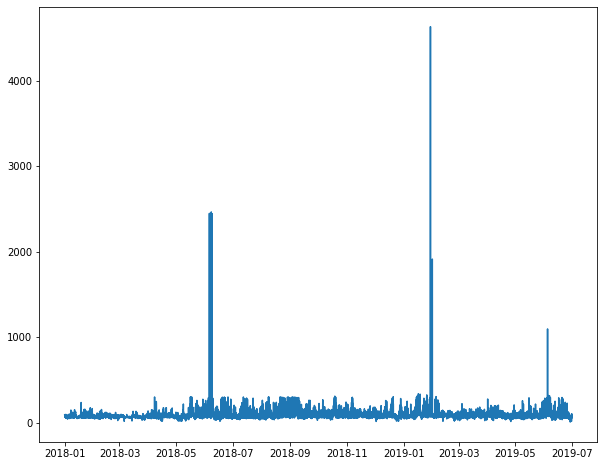

In [10]:
plt.figure(figsize = (10,8))
plt.plot(df_idx['RRP'])


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()

data1 = df_idx[['TOTALDEMAND']]
data2 = df_idx[['RRP']]

data1= pd.DataFrame(data = sc1.fit_transform(data1))
data1 = data1.rename(columns = {0:'TOTALDEMAND'})
data2= pd.DataFrame(data = sc2.fit_transform(data2))
data2 = data2.rename(columns = {0:'RRP'})
#dataN = sc.fit_transform(data1)
#train_sc = sc.fit_transform(trainP)
#test_sc = sc.transform(testP)
#train_sc = trainP
#test_sc = testP

dataN = data1.join(data2)
dataN.head(5)

,TOTALDEMAND,RRP
0,-0.917112,0.112365
1,-1.051671,0.062061
2,-1.277446,-0.190450
3,-1.427866,-0.225812
4,-1.510635,-0.262668


In [12]:
dataN.head(5)

,TOTALDEMAND,RRP
0,-0.917112,0.112365
1,-1.051671,0.062061
2,-1.277446,-0.190450
3,-1.427866,-0.225812
4,-1.510635,-0.262668


In [13]:
#df = pd.read_csv('E-price.csv')

#split_date = pd.Timestamp('2018-09-01 00:00:00')
#train = df_idx[:split_date]
#test = df_idx[split_date:]

split = int(0.75*len(df_idx))
train = dataN[:split]
test = dataN[split:]
df_idx_1 = df_idx[:split]
df_idx_2 = df_idx[split:]
train_times = dftimes[:split]
test_times = dftimes[split:]
#train = df_idx[:600]
#test = df_idx[600:750]

In [14]:
train.head(5)

,TOTALDEMAND,RRP
0,-0.917112,0.112365
1,-1.051671,0.062061
2,-1.277446,-0.190450
3,-1.427866,-0.225812
4,-1.510635,-0.262668


In [15]:
test.head(5)

,TOTALDEMAND,RRP
19656,0.037818,-0.031074
19657,0.003803,0.062726
19658,0.066624,0.145402
19659,0.055625,0.039649
19660,0.137481,0.212639


In [16]:
trainP = pd.DataFrame(train)
testP = pd.DataFrame(test)

In [17]:
print(len(trainP))
print(len(testP))

19656
6552


In [18]:
#len(df_idx_1.index)

train_sc_df = trainP.set_index(df_idx_1.index)
test_sc_df = test.set_index(df_idx_2.index)
#test_sc_df = pd.DataFrame(testP, columns=[['TOTALDEMAND','T']])
train_sc_df = train_sc_df.rename(columns={'RRP': 'T'})
test_sc_df = test_sc_df.rename(columns={'RRP':'T'})
train_sc_df = train_sc_df.join(train_times)
test_sc_df = test_sc_df.join(test_times)

In [19]:
train_sc_df.head(5)

,TOTALDEMAND,T,DATE,Time,Day Night
SETTLEMENTDATE,,,,,
2018-01-01 00:30:00,-0.917112,0.112365,0,5,0
2018-01-01 01:00:00,-1.051671,0.062061,0,6,0
2018-01-01 01:30:00,-1.277446,-0.190450,0,7,0
2018-01-01 02:00:00,-1.427866,-0.225812,0,8,0
2018-01-01 02:30:00,-1.510635,-0.262668,0,9,0


In [20]:
test_sc_df.head(5)

,TOTALDEMAND,T,DATE,Time,Day Night
SETTLEMENTDATE,,,,,
2019-02-14 12:30:00,0.037818,-0.031074,61,5,1
2019-02-14 13:00:00,0.003803,0.062726,61,6,1
2019-02-14 13:30:00,0.066624,0.145402,61,7,1
2019-02-14 14:00:00,0.055625,0.039649,61,8,1
2019-02-14 14:30:00,0.137481,0.212639,61,9,1


In [21]:
for s in range(0,2):
    train_sc_df['T-{}'.format(s)] = train_sc_df['T'].shift(s)
    test_sc_df['T-{}'.format(s)] = test_sc_df['T'].shift(s)


train_sc_df.head(5)

,TOTALDEMAND,T,DATE,Time,Day Night,T-0,T-1
SETTLEMENTDATE,,,,,,,
2018-01-01 00:30:00,-0.917112,0.112365,0,5,0,0.112365,NaN
2018-01-01 01:00:00,-1.051671,0.062061,0,6,0,0.062061,0.112365
2018-01-01 01:30:00,-1.277446,-0.190450,0,7,0,-0.190450,0.062061
2018-01-01 02:00:00,-1.427866,-0.225812,0,8,0,-0.225812,-0.190450
2018-01-01 02:30:00,-1.510635,-0.262668,0,9,0,-0.262668,-0.225812


In [22]:
train_sc_df = train_sc_df[['Day Night','Time','T-1','T']]
test_sc_df = test_sc_df[['Day Night','Time','T-1','T']]

#train_sc_df = train_sc_df[['T', 'T+1']]
#test_sc_df = test_sc_df[['T','T+1']]

#train_sc_df = train_sc_df[['TOTALDEMAND','T-1','T', 'T+1']]
#test_sc_df = test_sc_df[['TOTALDEMAND','T-1','T','T+1']]
train_sc_df.head(5)

,Day Night,Time,T-1,T
SETTLEMENTDATE,,,,
2018-01-01 00:30:00,0,5,NaN,0.112365
2018-01-01 01:00:00,0,6,0.112365,0.062061
2018-01-01 01:30:00,0,7,0.062061,-0.190450
2018-01-01 02:00:00,0,8,-0.190450,-0.225812
2018-01-01 02:30:00,0,9,-0.225812,-0.262668


In [23]:
train_sc_df = train_sc_df.dropna()
test_sc_df = test_sc_df.dropna()

X_train = train_sc_df.drop('T', axis=1)
y_train = train_sc_df[['T']]

X_test = test_sc_df.drop('T', axis=1)
y_test = test_sc_df[['T']]

#X_train = train_sc_df.drop('T+1', axis=1)
#y_train = train_sc_df['T+1']

#X_test = test_sc_df.drop('T+1', axis=1)
#y_test = test_sc_df['T+1']


In [24]:
split0 = '2019-03-01 00:00:00'
split00 = '2019-03-31 23:30:00'
split1 = '2019-04-01 00:00:00'
split11 = '2019-04-30 23:30:00'
split2 = '2019-05-01 00:00:00'
split22 = '2019-05-31 23:30:00'
split3 = '2019-06-01 00:00:00'
split33 = '2019-06-30 23:30:00'

MarchX = X_test.loc[split0:split00].values
AprilX = X_test.loc[split1:split11].values
MayX = X_test.loc[split2:split22].values
JuneX = X_test.loc[split3:split33].values

MarchY = y_test.loc[split0:split00].values
AprilY = y_test.loc[split1:split11].values
MayY = y_test.loc[split2:split22].values
JuneY = y_test.loc[split3:split33].values



In [25]:
y_train.head(5)

,T
SETTLEMENTDATE,
2018-01-01 01:00:00,0.062061
2018-01-01 01:30:00,-0.190450
2018-01-01 02:00:00,-0.225812
2018-01-01 02:30:00,-0.262668
2018-01-01 03:00:00,-0.276447


In [26]:
X_train = X_train.values
Y_train = y_train.values

X_test = X_test.values
Y_test = y_test.values

In [27]:
X_train

array([[ 0.        ,  6.        ,  0.1123646 ],
       [ 0.        ,  7.        ,  0.06206148],
       [ 0.        ,  8.        , -0.19045027],
       ...,
       [ 0.        ,  2.        ,  0.07816512],
       [ 0.        ,  3.        ,  0.1437418 ],
       [ 1.        ,  4.        ,  0.11336071]])

In [28]:
Y_train

array([[ 0.06206148],
       [-0.19045027],
       [-0.22581187],
       ...,
       [ 0.1437418 ],
       [ 0.11336071],
       [-0.06776376]])

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GRU
import keras
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras import optimizers

Using TensorFlow backend.


In [30]:
x = Y_train.shape[0]
y = Y_test.shape[0]
Y_train = Y_train.reshape(x,1)
Y_test = Y_test.reshape(y,1)

In [31]:
samples0, features0 = X_train.shape
samples1, features1 = Y_train.shape
samples2, features2 = X_test.shape
samples3, features3 = Y_test.shape

In [32]:
timesteps = 1
X_train = X_train.reshape(samples0, timesteps, features0)
Y_train = Y_train.reshape(samples1, timesteps, features1)
X_test = X_test.reshape(samples2, timesteps, features2)
Y_test = Y_test.reshape(samples3, timesteps, features3)

In [33]:
X_train

array([[[ 0.        ,  6.        ,  0.1123646 ]],

       [[ 0.        ,  7.        ,  0.06206148]],

       [[ 0.        ,  8.        , -0.19045027]],

       ...,

       [[ 0.        ,  2.        ,  0.07816512]],

       [[ 0.        ,  3.        ,  0.1437418 ]],

       [[ 1.        ,  4.        ,  0.11336071]]])

In [34]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(19655, 1, 3)
(19655, 1, 1)
(6551, 1, 3)
(6551, 1, 1)


In [35]:
smp1X,fea1X = MarchX.shape
smp1Y,fea1Y = MarchY.shape
smp2X,fea2X = AprilX.shape
smp2Y,fea2Y = AprilY.shape
smp3X,fea3X = MayX.shape
smp3Y,fea3Y = MayY.shape
smp4X,fea4X = JuneX.shape
smp4Y,fea4Y = JuneY.shape

In [36]:
MarchX.shape

(1488, 3)

In [37]:
dfANN = pd.DataFrame(columns=['Option','R2 Score (Train)', 'Mean Absolute Error (Train)', 
                              'R2 Score (Test)', 'Mean Absolute Error (Test)'])

params = [1,2,3,4,5,6,7,8,9,10]
#r2_scores = []
#mae = []
for i in params:
    #Build Model
    
    
    XNN_train = X_train.reshape(samples0, features0)
    YNN_train = Y_train.reshape(samples1, features1)
    XNN_test = X_test.reshape(samples2, features2)
    YNN_test = Y_test.reshape(samples3, features3)

    model3 = Sequential()
    model3.add(Dense(12, input_shape=(XNN_train.shape[1],), kernel_initializer = 'lecun_uniform', activation = 'relu'))
    model3.add(Dense(12, input_shape=(XNN_train.shape[1],), activation = 'relu'))
    model3.add(Dense(1))

    #Compile andd fit model to training data
    model3.compile(optimizer=Nadam(lr=0.001), loss= 'mean_absolute_error', metrics = ['mape'])
    model3.fit(XNN_train, YNN_train, epochs=40, verbose=0)

    #predictions on training set
    ANN_train_predictions = model3.predict(XNN_train, verbose = 0, batch_size = 1)
    ANN_train_predictions= ANN_train_predictions.reshape(samples1, 1)


    #predictions on testing set
    ANN_test_predictions = model3.predict(XNN_test, verbose = 0, batch_size = 1)
    ANN_test_predictions= ANN_test_predictions.reshape(samples3, 1)

    #Reshape train and test set
    YNN_train = YNN_train.reshape(samples1,features1)
    YNN_test = YNN_test.reshape(samples3,features3)

    ANN_train_predictions_scaled = sc2.inverse_transform(ANN_train_predictions)
    YNN_train_scaled = sc2.inverse_transform(YNN_train)
    ANN_test_predictions_scaled = sc2.inverse_transform(ANN_test_predictions)
    YNN_test_scaled = sc2.inverse_transform(YNN_test)


    dfANN = dfANN.append({'Option': i,
                          'R2 Score (Train)': r2_score(YNN_train_scaled, ANN_train_predictions_scaled),
                          'Mean Absolute Error (Train)': mean_absolute_error(YNN_train_scaled, ANN_train_predictions_scaled),
                          'R2 Score (Test)':r2_score(YNN_test_scaled, ANN_test_predictions_scaled),
                          'Mean Absolute Error (Test)': mean_absolute_error(YNN_test_scaled, ANN_test_predictions_scaled)},
                         ignore_index=True)
dfANN.head(5)

    #print("ANN R2 Score for train set: {}".format(r2_score(YNN_train_scaled, ANN_train_predictions_scaled)))
    #print("ANN Mean Absolute Error for train set: {}".format(mean_absolute_error(YNN_train_scaled, ANN_train_predictions_scaled)))
    #print("ANN R2 Score for test set: {}".format(r2_score(YNN_test_scaled, ANN_test_predictions_scaled)))
    #print("ANN Mean Absolute Error for test set: {}".format(mean_absolute_error(YNN_test_scaled, ANN_test_predictions_scaled)))


W0104 19:13:25.629271 13708 deprecation_wrapper.py:119] From C:\Users\sashv\Anaconda3\envs\Update\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0104 19:13:25.748965 13708 deprecation_wrapper.py:119] From C:\Users\sashv\Anaconda3\envs\Update\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0104 19:13:25.779885 13708 deprecation_wrapper.py:119] From C:\Users\sashv\Anaconda3\envs\Update\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0104 19:13:25.894593 13708 deprecation_wrapper.py:119] From C:\Users\sashv\Anaconda3\envs\Update\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0104 19:13:26.170273 13708 depr

,Option,R2 Score (Train),Mean Absolute Error (Train),R2 Score (Test),Mean Absolute Error (Test)
0,1.0,0.339021,11.155241,0.655394,9.100347
1,2.0,0.322629,10.721651,0.650572,8.918964
2,3.0,0.308507,10.764990,0.657072,8.895873
3,4.0,0.313075,10.774082,0.641899,8.977791
4,5.0,0.302224,10.778921,0.661757,8.796367


In [38]:
dfANN.to_csv('C:/Users/sashv/Downloads/Electricity data/tables/testANN.csv')

In [39]:
dfANN = pd.DataFrame(columns=['Option','R2 Score (Train)', 'Mean Absolute Error (Train)', 
                              'R2 Score (Test)', 'Mean Absolute Error (Test)'])

#params = []
#r2_scores = []
#mae = []
#for i in params:
#Build Model

MarchXNN = MarchX.reshape(smp1X,fea1X)
MarchYNN = MarchY.reshape(smp1Y,fea1Y)
AprilXNN = AprilX.reshape(smp2X,fea2X)
AprilYNN = AprilY.reshape(smp2Y,fea2Y)
MayXNN = MayX.reshape(smp3X,fea3X)
MayYNN = MayY.reshape(smp3Y,fea3Y)
JuneXNN = JuneX.reshape(smp4X,fea4X)
JuneYNN = JuneY.reshape(smp4Y,fea4Y)

months = ['March', 'April', 'May', 'June']
monthsX = [MarchXNN, AprilXNN, MayXNN, JuneXNN]
monthsY = [MarchYNN, AprilYNN, MayYNN, JuneYNN]
samplesX = [smp1X, smp2X, smp3X, smp4X]
    
for i,j,k,l in zip(months, monthsX, monthsY, samplesX):    
    XNN_train = X_train.reshape(samples0, features0)
    YNN_train = Y_train.reshape(samples1, features1)
    XNN_test = X_test.reshape(samples2, features2)
    YNN_test = Y_test.reshape(samples3, features3)

    model3 = Sequential()
    model3.add(Dense(12, input_shape=(XNN_train.shape[1],), kernel_initializer = 'lecun_uniform', activation = 'relu'))
    model3.add(Dense(12, input_shape=(XNN_train.shape[1],), activation = 'relu'))
    model3.add(Dense(1))

    #Compile andd fit model to training data
    model3.compile(optimizer=Nadam(lr=0.001), loss= 'mean_absolute_error', metrics = ['mape'])
    model3.fit(XNN_train, YNN_train, epochs=40, verbose=0)


    #predictions on testing set
    ANN_test_predictions = model3.predict(j, verbose = 0, batch_size = 1)
    ANN_test_predictions= ANN_test_predictions.reshape(l, 1)

    #Reshape train and test set
    YNN_test = k.reshape(l,1)

    ANN_test_predictions_scaled = sc2.inverse_transform(ANN_test_predictions)
    YNN_test_scaled = sc2.inverse_transform(YNN_test)


    dfANN = dfANN.append({'Option': i,
                          'R2 Score (Test)':r2_score(YNN_test_scaled, ANN_test_predictions_scaled),
                          'Mean Absolute Error (Test)': mean_absolute_error(YNN_test_scaled, ANN_test_predictions_scaled)},
                         ignore_index=True)
dfANN.head(5)

    #print("ANN R2 Score for train set: {}".format(r2_score(YNN_train_scaled, ANN_train_predictions_scaled)))
    #print("ANN Mean Absolute Error for train set: {}".format(mean_absolute_error(YNN_train_scaled, ANN_train_predictions_scaled)))
    #print("ANN R2 Score for test set: {}".format(r2_score(YNN_test_scaled, ANN_test_predictions_scaled)))
    #print("ANN Mean Absolute Error for test set: {}".format(mean_absolute_error(YNN_test_scaled, ANN_test_predictions_scaled)))


,Option,R2 Score (Train),Mean Absolute Error (Train),R2 Score (Test),Mean Absolute Error (Test)
0,March,NaN,NaN,0.759376,7.689572
1,April,NaN,NaN,0.727281,7.598112
2,May,NaN,NaN,0.659516,7.527719
3,June,NaN,NaN,0.612824,13.315818


In [40]:
dfANN.to_csv('C:/Users/sashv/Downloads/Electricity data/tables/MonthsANN.csv')

In [41]:
def z_construct(data, timesteps):#Reconstruct x train and test
    
    buffer = [data[:][i:i+timesteps] for i in range(len(data)-timesteps)]
    
    intermediate = np.reshape(buffer,  (-1, np.shape(buffer)[2]))
    array = intermediate.reshape(int(len(intermediate)/timesteps), timesteps, np.shape(intermediate)[1])
    return array
   

def y_construct(data, timesteps):#Resconstruct y train and test
    buffer = [data[:][i+(timesteps-1)] for i in range(len(data)-timesteps)]
    intermediate = np.reshape(buffer,(-1))
    array = intermediate.reshape(len(intermediate),)
    return array


In [42]:
X_train = X_train.reshape(samples0, features0)
Y_train = Y_train.reshape(samples1,features1)
X_test = X_test.reshape(samples2, features2)
Y_test = Y_test.reshape(samples3, features3)

XL_train = X_train
YL_train = Y_train
XL_test = X_test
YL_test = Y_test

timesteps = 3

XLS_train = z_construct(XL_train, timesteps)
YLS_train = y_construct(YL_train,timesteps)
XLS_test = z_construct(XL_test, timesteps)
YLS_test = y_construct(YL_test,timesteps)

In [43]:
XLS_train

array([[[ 0.        ,  6.        ,  0.1123646 ],
        [ 0.        ,  7.        ,  0.06206148],
        [ 0.        ,  8.        , -0.19045027]],

       [[ 0.        ,  7.        ,  0.06206148],
        [ 0.        ,  8.        , -0.19045027],
        [ 0.        ,  9.        , -0.22581187]],

       [[ 0.        ,  8.        , -0.19045027],
        [ 0.        ,  9.        , -0.22581187],
        [ 0.        , 10.        , -0.26266763]],

       ...,

       [[ 0.        , 23.        , -0.0592969 ],
        [ 0.        ,  0.        , -0.12835994],
        [ 0.        ,  1.        , -0.12919002]],

       [[ 0.        ,  0.        , -0.12835994],
        [ 0.        ,  1.        , -0.12919002],
        [ 0.        ,  2.        ,  0.07816512]],

       [[ 0.        ,  1.        , -0.12919002],
        [ 0.        ,  2.        ,  0.07816512],
        [ 0.        ,  3.        ,  0.1437418 ]]])

In [44]:
YLS_train.shape[0]

19652

In [45]:
dfLST = pd.DataFrame(columns=['Option','R2 Score (Train)', 'Mean Absolute Error (Train)', 'R2 Score (Test)', 
                              'Mean Absolute Error (Test)'])

times = [1,2,3,4,5,6,7,8,9,10]

for i in times:

    X_train = X_train.reshape(samples0, features0)
    Y_train = Y_train.reshape(samples1,features1)
    X_test = X_test.reshape(samples2, features2)
    Y_test = Y_test.reshape(samples3, features3)

    XL_train = X_train
    YL_train = Y_train
    XL_test = X_test
    YL_test = Y_test

    timesteps = i

    XLS_train = z_construct(XL_train, timesteps)
    YLS_train = y_construct(YL_train,timesteps)
    XLS_test = z_construct(XL_test, timesteps)
    YLS_test = y_construct(YL_test,timesteps)

    #XL_train = X_train.reshape(samples0, timesteps, features0)
    #YL_train = Y_train.reshape(samples1, timesteps, features1)
    #XL_test = X_test.reshape(samples2, timesteps, features2)
    #YL_test = Y_test.reshape(samples3, timesteps, features3)

    #Build Model
    model2 = Sequential()
    model2.add(LSTM(12, input_shape=(timesteps,np.shape(XLS_train)[2]), return_sequences = True, kernel_initializer = 'lecun_uniform', activation = 'relu'))
    #model2.add(LSTM(12, return_sequences=True, activation = 'relu'))
    model2.add(LSTM(12, return_sequences=False, activation = 'relu'))
    model2.add(Dense(1))

    #Get best weight
    stop = EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=True)


    #Compile and fit model
    model2.compile(optimizer=Nadam(lr=0.001), loss= 'mean_absolute_error', metrics = ['mape'])
    model2.fit(XLS_train, YLS_train, epochs=40, verbose = 0, callbacks = [stop])

    #Predict train and test set
    LSTM_train_predictions = model2.predict(XLS_train, verbose = 0, batch_size = 1)
    LSTM_test_predictions = model2.predict(XLS_test, verbose = 0, batch_size = 1)
    
    YL_train = YLS_train.reshape(YLS_train.shape[0],1)
    YL_test = YLS_test.reshape(YLS_test.shape[0],1)

    LSTM_train_predictions_scaled = sc2.inverse_transform(LSTM_train_predictions)
    YLSTM_train_scaled = sc2.inverse_transform(YL_train)
    LSTM_test_predictions_scaled = sc2.inverse_transform(LSTM_test_predictions)
    YLSTM_test_scaled = sc2.inverse_transform(YL_test)
    
    
    dfLST = dfLST.append({'Option': i,
                      'R2 Score (Train)': r2_score(YLSTM_train_scaled, LSTM_train_predictions_scaled),
                      'Mean Absolute Error (Train)': mean_absolute_error(YLSTM_train_scaled, LSTM_train_predictions_scaled),
                      'R2 Score (Test)':r2_score(YLSTM_test_scaled, LSTM_test_predictions_scaled),
                      'Mean Absolute Error (Test)': mean_absolute_error(YLSTM_test_scaled, LSTM_test_predictions_scaled)},
                     ignore_index=True)
dfLST

W0104 19:21:26.628000 13708 deprecation.py:323] From C:\Users\sashv\Anaconda3\envs\Update\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


,Option,R2 Score (Train),Mean Absolute Error (Train),R2 Score (Test),Mean Absolute Error (Test)
0,1.0,0.317259,10.582669,0.666688,8.609628
1,2.0,0.354513,10.543516,0.680925,8.620767
2,3.0,0.258786,10.783322,0.677222,8.772392
3,4.0,0.248832,10.618157,0.680330,8.858724
4,5.0,0.267790,12.445908,0.653993,10.287922
5,6.0,0.288240,11.265223,0.639272,9.538792
6,7.0,0.265239,10.455133,0.661732,8.641057
7,8.0,0.294142,10.352659,0.662089,8.652300
8,9.0,0.334937,10.897719,0.682848,8.779124
9,10.0,0.265174,11.435534,0.670694,9.513678


In [46]:
dfLST.to_csv('C:/Users/sashv/Downloads/Electricity data/tables/LSTM910.csv')

In [47]:
timesteps = 1
MarchXLSTM = MarchX.reshape(smp1X,timesteps,fea1X)
MarchYLSTM = MarchY.reshape(smp1Y,timesteps,fea1Y)
AprilXLSTM = AprilX.reshape(smp2X,timesteps,fea2X)
AprilYLSTM = AprilY.reshape(smp2Y,timesteps,fea2Y)
MayXLSTM = MayX.reshape(smp3X,timesteps,fea3X)
MayYLSTM = MayY.reshape(smp3Y,timesteps,fea3Y)
JuneXLSTM = JuneX.reshape(smp4X,timesteps,fea4X)
JuneYLSTM = JuneY.reshape(smp4Y,timesteps,fea4Y)



months = ['March', 'April', 'May', 'June']
monthsX = [MarchXLSTM, AprilXLSTM, MayXLSTM, JuneXLSTM]
monthsY = [MarchYLSTM, AprilYLSTM, MayYLSTM, JuneYLSTM]
samplesX = [smp1X, smp2X, smp3X, smp4X]
featuresX = [fea1X, fea2X, fea3X, fea4X]
featuresY = [fea1Y, fea2Y, fea3Y, fea4Y]


dfLSTM = pd.DataFrame(columns=['Option', 'R2 Score (Test)', 'Mean Absolute Error (Test)'])
#params = ['relu']
#['huber_loss']
#r2_scores = []
#mae = []
for i,j,k,l in zip(months, monthsX, monthsY, samplesX): 
    
    timesteps = 1
    
    XL_train = X_train.reshape(samples0, timesteps, features0)
    YL_train = Y_train.reshape(samples1, features1)
    XL_test = X_test.reshape(samples2, timesteps, features2)
    YL_test = Y_test.reshape(samples3, timesteps, features3)
    
    
    MarchXLSTM = MarchX.reshape(smp1X,timesteps,fea1X)
    MarchYLSTM = MarchY.reshape(smp1Y,timesteps,fea1Y)
    AprilXLSTM = AprilX.reshape(smp2X,timesteps,fea2X)
    AprilYLSTM = AprilY.reshape(smp2Y,timesteps,fea2Y)
    MayXLSTM = MayX.reshape(smp3X,timesteps,fea3X)
    MayYLSTM = MayY.reshape(smp3Y,timesteps,fea3Y)
    JuneXLSTM = JuneX.reshape(smp4X,timesteps,fea4X)
    JuneYLSTM = JuneY.reshape(smp4Y,timesteps,fea4Y)
    
    
    #Build Model
    model2 = Sequential()
    model2.add(LSTM(12, input_shape=(timesteps,features0), return_sequences = True, kernel_initializer = 'lecun_uniform', activation = 'relu'))
    model2.add(LSTM(12, return_sequences = False, activation = 'relu'))
    model2.add(Dense(1))

    #Compile and fit model
    model2.compile(optimizer=Nadam(lr=0.001), loss= 'mean_absolute_error', metrics = ['mape'])
    model2.fit(XL_train, YL_train, epochs=40, verbose=0)

    #Predict train and test set
    
    LSTM_test_predictions = model2.predict(j, verbose = 0, batch_size = 1)

    #Reshape set
    
    LSTM_test_predictions = LSTM_test_predictions.reshape(l, 1)

    
    YL_test = k.reshape(l,1)

    
    LSTM_test_predictions_scaled = sc2.inverse_transform(LSTM_test_predictions)
    YLSTM_test_scaled = sc2.inverse_transform(YL_test)
    
    dfLSTM = dfLSTM.append({'Option': i,
                          'R2 Score (Test)':r2_score(YLSTM_test_scaled, LSTM_test_predictions_scaled),
                          'Mean Absolute Error (Test)': mean_absolute_error(YLSTM_test_scaled, LSTM_test_predictions_scaled)},
                         ignore_index=True)
dfLSTM.head(5)

    #print("LSTM R2 Score for train set: {}".format(r2_score(YLSTM_train_scaled, LSTM_train_predictions_scaled)))
    #print("LSTM Mean Absolute Error for train set: {}".format(mean_absolute_error(YLSTM_train_scaled, LSTM_train_predictions_scaled)))
    #print("LSTM R2 Score for test set: {}".format(r2_score(YLSTM_test_scaled, LSTM_test_predictions_scaled)))
    #print("LSTM Mean Absolute Error for test set: {}".format(mean_absolute_error(YLSTM_test_scaled, LSTM_test_predictions_scaled)))




,Option,R2 Score (Test),Mean Absolute Error (Test)
0,March,0.756272,7.768681
1,April,0.751327,7.715732
2,May,0.672120,7.378407
3,June,0.490407,13.245382


In [48]:
dfLSTM.to_csv('C:/Users/sashv/Downloads/Electricity data/tables/monthsLSTM.csv')

In [49]:
dfGR = pd.DataFrame(columns=['Option','R2 Score (Train)', 'Mean Absolute Error (Train)', 'R2 Score (Test)', 'Mean Absolute Error (Test)'])

params = [1,2,3,4,5,6,7,8,9,10]

for i in params:

    X_train = X_train.reshape(samples0, features0)
    Y_train = Y_train.reshape(samples1,features1)
    X_test = X_test.reshape(samples2, features2)
    Y_test = Y_test.reshape(samples3, features3)

    XG_train = X_train
    YG_train = Y_train
    XG_test = X_test
    YG_test = Y_test

    timesteps = i

    XGR_train = z_construct(XG_train, timesteps)
    YGR_train = y_construct(YG_train,timesteps)
    XGR_test = z_construct(XG_test, timesteps)
    YGR_test = y_construct(YG_test,timesteps)


    #Build Model
    model1 = Sequential()
    model1.add(GRU(12, input_shape=(timesteps,np.shape(XGR_train)[2]), 
                   return_sequences = True, kernel_initializer = 'lecun_uniform', activation = 'relu'))
    model1.add(GRU(12, return_sequences = False, activation = 'relu'))
    model1.add(Dense(1))
    
    #Get best weights
    stop = EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

    #Compile Model
    model1.compile(optimizer=Nadam(lr=0.001), loss= 'mean_absolute_error', metrics = ['mape'])
    model1.fit(XGR_train, YGR_train, epochs=40, verbose=0, callbacks = [stop])

    #Predict train and test set
    GRU_train_predictions = model1.predict(XGR_train, verbose = 0, batch_size = 1)
    GRU_test_predictions = model1.predict(XGR_test, verbose = 0, batch_size = 1)

    #Reshape sets
    #GRU_train_predictions = GRU_train_predictions.reshape(samples1, 1)
    #GRU_test_predictions = GRU_test_predictions.reshape(samples3, 1)

    YG_train = YGR_train.reshape(YGR_train.shape[0],1)
    YG_test = YGR_test.reshape(YGR_test.shape[0],1)

    GRU_train_predictions_scaled = sc2.inverse_transform(GRU_train_predictions)
    YGRU_train_scaled = sc2.inverse_transform(YGR_train)
    GRU_test_predictions_scaled = sc2.inverse_transform(GRU_test_predictions)
    YGRU_test_scaled = sc2.inverse_transform(YGR_test)
    
    dfGR = dfGR.append({'Option': i,
                          'R2 Score (Train)': r2_score(YGRU_train_scaled, GRU_train_predictions_scaled),
                          'Mean Absolute Error (Train)': mean_absolute_error(YGRU_train_scaled, GRU_train_predictions_scaled),
                          'R2 Score (Test)':r2_score(YGRU_test_scaled, GRU_test_predictions_scaled),
                          'Mean Absolute Error (Test)': mean_absolute_error(YGRU_test_scaled, GRU_test_predictions_scaled)},
                         ignore_index=True)
dfGR.head(5)

,Option,R2 Score (Train),Mean Absolute Error (Train),R2 Score (Test),Mean Absolute Error (Test)
0,1.0,0.297895,10.661022,0.675959,8.693822
1,2.0,0.264282,10.634311,0.669858,8.663342
2,3.0,0.257959,10.426239,0.667368,8.574092
3,4.0,0.384305,11.789519,0.669007,9.794355
4,5.0,0.289540,14.022241,0.623656,11.908272


In [50]:
dfGR.to_csv('C:/Users/sashv/Downloads/Electricity data/tables/GR10.csv')

In [51]:
timesteps = 1
MarchXGRU = MarchX.reshape(smp1X,timesteps,fea1X)
MarchYGRU = MarchY.reshape(smp1Y,timesteps,fea1Y)
AprilXGRU = AprilX.reshape(smp2X,timesteps,fea2X)
AprilYGRU = AprilY.reshape(smp2Y,timesteps,fea2Y)
MayXGRU = MayX.reshape(smp3X,timesteps,fea3X)
MayYGRU = MayY.reshape(smp3Y,timesteps,fea3Y)
JuneXGRU = JuneX.reshape(smp4X,timesteps,fea4X)
JuneYGRU = JuneY.reshape(smp4Y,timesteps,fea4Y)

months = ['March', 'April', 'May', 'June']
monthsX = [MarchXGRU, AprilXGRU, MayXGRU, JuneXGRU]
monthsY = [MarchYGRU, AprilYGRU, MayYGRU, JuneYGRU]
samplesX = [smp1X, smp2X, smp3X, smp4X]
featuresX = [fea1X, fea2X, fea3X, fea4X]
featuresY = [fea1Y, fea2Y, fea3Y, fea4Y]

dfGRU = pd.DataFrame(columns=['Option','R2 Score (Test)', 'Mean Absolute Error (Test)'])
#r2_scores = []
#mae = []

for i,j,k,l in zip(months, monthsX, monthsY, samplesX):   
    
    timesteps = 1
    XG_train = X_train.reshape(samples0, timesteps, features0)
    YG_train = Y_train.reshape(samples1, features1)
    XG_test = X_test.reshape(samples2, timesteps, features2)
    YG_test = Y_test.reshape(samples3, timesteps, features3)
    
    MarchYGRU = MarchY.reshape(smp1Y,timesteps,fea1Y)
    AprilXGRU = AprilX.reshape(smp2X,timesteps,fea2X)
    AprilYGRU = AprilY.reshape(smp2Y,timesteps,fea2Y)
    MayXGRU = MayX.reshape(smp3X,timesteps,fea3X)
    MayYGRU = MayY.reshape(smp3Y,timesteps,fea3Y)
    JuneXGRU = JuneX.reshape(smp4X,timesteps,fea4X)
    JuneYGRU = JuneY.reshape(smp4Y,timesteps,fea4Y)

    #Build Model
    model1 = Sequential()
    model1.add(GRU(12, input_shape=(timesteps,features0), return_sequences = True, kernel_initializer = 'lecun_uniform', activation = 'relu'))
    model1.add(GRU(12, return_sequences = False ,activation = 'relu'))
    model1.add(Dense(1))

    #Compile Model
    model1.compile(optimizer=Nadam(lr=0.001), loss= 'mean_absolute_error', metrics = ['mape'])
    model1.fit(XG_train, YG_train, epochs=40, verbose=0)

    #Predict train and test set
    GRU_test_predictions = model1.predict(j, verbose = 0, batch_size = 1)

    #Reshape sets
   
    GRU_test_predictions = GRU_test_predictions.reshape(l, 1)

    
    YG_test = k.reshape(l,1)

    GRU_test_predictions_scaled = sc2.inverse_transform(GRU_test_predictions)
    YGRU_test_scaled = sc2.inverse_transform(YG_test)
    
    dfGRU = dfGRU.append({'Option': i,
                          'R2 Score (Test)':r2_score(YGRU_test_scaled, GRU_test_predictions_scaled),
                          'Mean Absolute Error (Test)': mean_absolute_error(YGRU_test_scaled, GRU_test_predictions_scaled)},
                         ignore_index=True)
dfGRU.head(5)

    #print("GRU R2 Score for train set: {}".format(r2_score(YGRU_train_scaled, GRU_train_predictions_scaled)))
    #print("GRU Mean Absolute Error for train set: {}".format(mean_absolute_error(YGRU_train_scaled, GRU_train_predictions_scaled)))
    #print("GRU R2 Score for test set: {}".format(r2_score(YGRU_test_scaled, GRU_test_predictions_scaled)))
    #print("GRU Mean Absolute Error for test set: {}".format(mean_absolute_error(YGRU_test_scaled, GRU_test_predictions_scaled)))




,Option,R2 Score (Test),Mean Absolute Error (Test)
0,March,0.763750,7.813908
1,April,0.740305,7.505390
2,May,0.676627,7.381834
3,June,0.463831,13.519515


In [52]:
dfGRU.to_csv('C:/Users/sashv/Downloads/Electricity data/tables/monthsGRU.csv')